In [1]:
import torch

In [2]:
model_yolo = torch.hub.load('../yolov5', 'custom', path='../yolov5/runs/train/exp5/weights/best.pt', source='local')

YOLOv5 🚀 v7.0-73-gb91f33e Python-3.10.6 torch-1.13.1+cu117 CUDA:0 (NVIDIA GeForce GTX 1060 with Max-Q Design, 6078MiB)

Fusing layers... 
Model summary: 267 layers, 46140588 parameters, 0 gradients
Adding AutoShape... 


In [3]:
import os

samples = []

root = "../figure-generator/generated/test/"
for _, _, files in os.walk(root):
    for file in files:
        path = os.path.join(root, file)
        if path.endswith(".png"):
            samples.append(path)

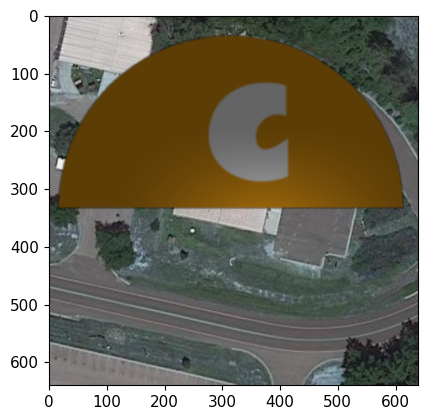

In [4]:
%matplotlib inline

from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(samples[3])

plt.imshow(img)

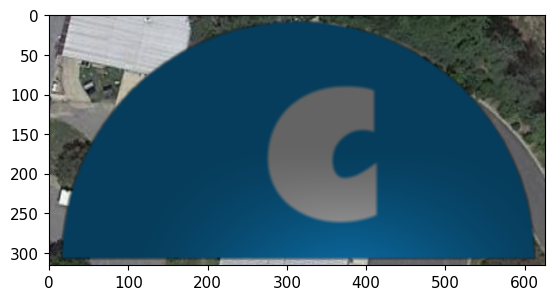

In [5]:
results = model_yolo(img)

cropped = results.crop(save=False)[0]["im"]

plt.imshow(cropped)

In [6]:
import torch
import torch.nn as nn

import string

from PIL import Image
from torchvision import transforms

In [7]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=False)
    
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(string.ascii_letters))

model.load_state_dict(torch.load('model_weights.pth'))

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model.to(device)

Using cache found in /home/kacper/.cache/torch/hub/pytorch_vision_v0.10.0


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [8]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

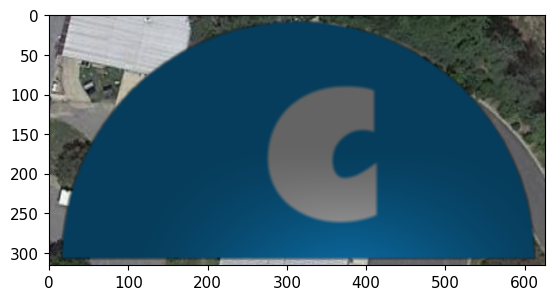

In [9]:
plt.imshow(cropped)

In [10]:
img = Image.fromarray(cropped)
img = preprocess(img)
img = torch.unsqueeze(img, 0)

img = img.to(device)

outputs = model(img)

string.ascii_letters[outputs.cpu().detach().numpy().argmax()]

'C'